In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

+ Define X original data and weight

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
w = rnd.normal(size = 3)

+ Define Poission distribution with X original data and y

In [3]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

+ plot the Poisson distribution

Text(0,0.5,'Number of appearances')

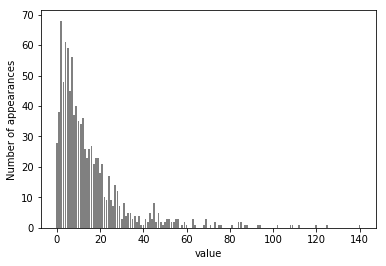

In [4]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.xlabel("value")
plt.ylabel("Number of appearances")

### Fit the Poisson distribution to normal distribution

- With log transformation, Poisson distribution is transformed to normal distribution. <br>
- A score of Ridge regression indicates how data distribution fit the linear model(normal distribution) <br>
- If the score is closed to 1, the distribution closes to linear(normal distribution).

Let's check the original Poisson data & transformed data

In [16]:
# original data (Poisson dist)
X_train, X_test, y_train, y_test = train_test_split(X, y)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Existing test socre : {:.3f}".format(score))

Existing test socre : 0.681


In [25]:
# transformed data (closed to normal dist)
X_train_log = np.log(X_train + 1) # + 1 makes better performance
X_test_log = np.log(X_test + 1)

Text(0,0.5,'Number of appearance')

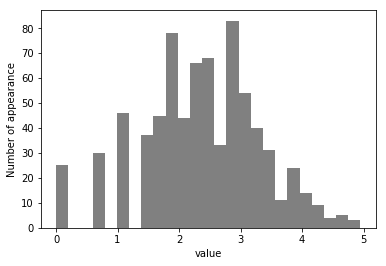

In [26]:
plt.hist(X_train_log[:, 0], bins=25, color = 'grey')
plt.xlabel("value")
plt.ylabel("Number of appearance")

In [27]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Transformed test score : {:.3f}".format(score))

Transformed test score : 0.877
